In [84]:
!pwd

/gpfs/gibbs/project/reilly/mcn26/check_edwin_ctrls


In [85]:
import pandas as pd

Load in my control file

In [86]:
my_ctrl_lib={"header":[],"sequence":[]}
with open("output.fasta","r") as f:
    headline=None
    for i in f:
        if i.startswith(">"):
            headline=i
        else:
            my_ctrl_lib["header"].append(headline.strip())
            my_ctrl_lib["sequence"].append(i.strip())

In [87]:
my_ctrl_lib=pd.DataFrame(my_ctrl_lib)

In [88]:
my_ctrl_lib["type"]=my_ctrl_lib["header"].apply(lambda x: x.split(":")[-1])

In [89]:
def simplify_type(inp):
    inp=inp.lower()
    if "neg" in inp:
        return "negative"
    elif "pos" in inp:
        return "positive"
    elif "emvar" in inp:
        return "emvar"
    else:
        raise Exception("weird type")

my_ctrl_lib["type"]=my_ctrl_lib["type"].apply(lambda x : simplify_type(x))

Check for duplicates in my library (I know there are some)

In [90]:
#drop duplicates on the basis of both sequence and type:
my_ctrl_lib = my_ctrl_lib.drop_duplicates(subset=['sequence','type'], keep='first')

In [91]:
#now check if there are still any duplicate sequences. If so, that suggests that multiple instances of the same oligo sequence were annotated with different control types, and will need to be manually disambuguated 
len(my_ctrl_lib)==len(my_ctrl_lib.drop_duplicates(subset='sequence', keep='first'))

False

In [92]:
#oh shoot. Let's check what those "duplicated sequences but not duplicated type" are. 
dups=my_ctrl_lib.groupby("sequence").filter(lambda x: len(x)>1)
dups=dups.sort_values("sequence")
len(dups)

38

In [93]:
dups

,header,sequence,type
143,>10:35356774:A:G:R:wC_ctrl:emvar_geuvadis,AAAAAAAAAAAATTCACCATTATTGTTTATTCTATTTATATAAAGT...,emvar
75,>10:35356774:A:G:R:wC_ctrl:pos_geuvadis,AAAAAAAAAAAATTCACCATTATTGTTTATTCTATTTATATAAAGT...,positive
157,>15:82258451:C:T:R:wC_ctrl:emvar_geuvadis,AAAGCTATGACATTATAAGGAAATGATATATTAACTGGTAGAACTC...,emvar
29,>15:82258451:C:T:R:wC_ctrl:pos_condel_geuvadis,AAAGCTATGACATTATAAGGAAATGATATATTAACTGGTAGAACTC...,positive
181,>19:9434872:C:T:R:wC_ctrl:emvar_geuvadis,AGCTGATGGGCCCGGGAACCCGAGGCCCCGCCCCCTAGGTGGTCCT...,emvar
95,>19:9434872:C:T:R:wC_ctrl:pos_geuvadis,AGCTGATGGGCCCGGGAACCCGAGGCCCCGCCCCCTAGGTGGTCCT...,positive
96,>19:54619191:A:G:R:wC_ctrl:pos_geuvadis,AGTAGCTTTGCCTCTATAACGGCGCGAGAGTGAGACGTCATCGGTG...,positive
193,>19:54619191:A:G:R:wC_ctrl:emvar_geuvadis,AGTAGCTTTGCCTCTATAACGGCGCGAGAGTGAGACGTCATCGGTG...,emvar
169,>17:44295052:T:C:R:wC_ctrl:emvar_geuvadis,CAAAGAAATACACACAGGGAGGCTGGGCGCCGTGGCTCACGCCTGT...,emvar
90,>17:44295052:T:C:R:wC_ctrl:pos_geuvadis,CAAAGAAATACACACAGGGAGGCTGGGCGCCGTGGCTCACGCCTGT...,positive


Ok, so it looks like the recalcitrant duplictes are emvar/positve. Not terribly surprising. Let's just concat...

In [94]:
my_ctrl_lib_reduced=my_ctrl_lib.groupby("sequence")["type"].apply(lambda x: "_".join(x)).reset_index()

In [95]:
#make sure we have ONE uni
len(my_ctrl_lib.drop_duplicates(subset='sequence', keep='first'))==len(my_ctrl_lib_reduced)

True

Load in Edwin's ctrl library.

In [96]:
edwin=pd.read_csv("control_seq.csv")

In [97]:
edwin

,seq_id,twist_seq
0,rs10249404_Non-Ref_A,ACTGGCCGCTTGACGTCAGTTAGAAGTCCTAAAGGCCCGGAGTTGC...
1,rs10249404_Ref_G,ACTGGCCGCTTGACGTCAGTTAGAAGTCCTAAAGGCCCGGAGTTGC...
2,rs1056008_Non-Ref_C,ACTGGCCGCTTGACGCCCCAGGAAGACTCAGTGGCTGAACCAGGTG...
3,rs1056008_Ref_T,ACTGGCCGCTTGACGCCCCAGGAAGACTCAGTGGCTGAACCAGGTG...
4,rs11080327_Non-Ref_A,ACTGGCCGCTTGACGATGAGAGCAATGGCTAAAGTTTGTCTGGCCT...
...,...,...
77,rs7646144_Ref_T_RC,GCAGGAGCCGCAGTGTGTTTAACCCAATGTGTTCTAACCTATTTGA...
78,rs80347459_Non-Ref_T_RC,GCAGGAGCCGCAGTGGGCAATCCTGTGCGACTGCTTTGAGCACCTG...
79,rs80347459_Ref_C_RC,GCAGGAGCCGCAGTGGGCAATCCTGTGCGACTGCTTTGAGCACCTG...
80,rs9283753_Non-Ref_T_RC,GCAGGAGCCGCAGTGTGATGTCTGCCCAATCCAACTGCCACCGTTA...


Let's separate the adapter sequences:

In [98]:
#first, let's make sure that the adapters are what we think they are
#we'll start by making sure they're all the same length
any(edwin["twist_seq"].str.len()!=200)

False

In [99]:
#perfect. what are the unique sets of first and last 15 bp (where we expect handles to be)?
edwin["twist_seq"].apply(lambda x: x[0:15]+"_"+x[-15:]).unique()

array(['ACTGGCCGCTTGACG_CACTGCGGCTCCTGC',
       'GCAGGAGCCGCAGTG_CGTCAAGCGGCCAGT'], dtype=object)

In [100]:
#looks like a set of primers and reverse complement, as expected. 
#having confirmed that, I will now trim 15 bp from either side. 
edwin["sequence"]=edwin["twist_seq"].apply(lambda x : x[15:-15])

In [101]:
#expected length is 200-15-15=170
any(edwin["sequence"].str.len()!=170)

False

In [102]:
my_ctrl_lib_reduced["sequence"]=my_ctrl_lib_reduced["sequence"].apply(lambda x : x[15:-15])

In [103]:
my_ctrl_lib_reduced["sequence"].str.len()

0      170
1      170
2      170
3      170
4      170
      ... 
669    170
670    170
671    170
672    170
673    170
Name: sequence, Length: 674, dtype: int64

In [104]:
#perf. Now let's see if we can merge in 'my_ctrl_lib_reduced'
merged=edwin.merge(my_ctrl_lib_reduced,how="left",on="sequence")

In [105]:
merged

,seq_id,twist_seq,sequence,type
0,rs10249404_Non-Ref_A,ACTGGCCGCTTGACGTCAGTTAGAAGTCCTAAAGGCCCGGAGTTGC...,TCAGTTAGAAGTCCTAAAGGCCCGGAGTTGCAACTGATGGGGGTTA...,NaN
1,rs10249404_Ref_G,ACTGGCCGCTTGACGTCAGTTAGAAGTCCTAAAGGCCCGGAGTTGC...,TCAGTTAGAAGTCCTAAAGGCCCGGAGTTGCAACTGATGGGGGTTA...,NaN
2,rs1056008_Non-Ref_C,ACTGGCCGCTTGACGCCCCAGGAAGACTCAGTGGCTGAACCAGGTG...,CCCCAGGAAGACTCAGTGGCTGAACCAGGTGGAGTCGTACATCGCA...,NaN
3,rs1056008_Ref_T,ACTGGCCGCTTGACGCCCCAGGAAGACTCAGTGGCTGAACCAGGTG...,CCCCAGGAAGACTCAGTGGCTGAACCAGGTGGAGTCGTACATCGCA...,NaN
4,rs11080327_Non-Ref_A,ACTGGCCGCTTGACGATGAGAGCAATGGCTAAAGTTTGTCTGGCCT...,ATGAGAGCAATGGCTAAAGTTTGTCTGGCCTCGCCCTATGAGAAGG...,NaN
...,...,...,...,...
77,rs7646144_Ref_T_RC,GCAGGAGCCGCAGTGTGTTTAACCCAATGTGTTCTAACCTATTTGA...,TGTTTAACCCAATGTGTTCTAACCTATTTGACTAGAAAACCCTTCA...,NaN
78,rs80347459_Non-Ref_T_RC,GCAGGAGCCGCAGTGGGCAATCCTGTGCGACTGCTTTGAGCACCTG...,GGCAATCCTGTGCGACTGCTTTGAGCACCTGGGGCTCTTCTAGTCC...,NaN
79,rs80347459_Ref_C_RC,GCAGGAGCCGCAGTGGGCAATCCTGTGCGACTGCTTTGAGCACCTG...,GGCAATCCTGTGCGACTGCTTTGAGCACCTGGGGCTCTTCTAGTCC...,NaN
80,rs9283753_Non-Ref_T_RC,GCAGGAGCCGCAGTGTGATGTCTGCCCAATCCAACTGCCACCGTTA...,TGATGTCTGCCCAATCCAACTGCCACCGTTAGCTAATTTTAGTCTT...,NaN


Ok, that didn't work. Let's check edwin's against the tewhey ctrls (Direct Identification of Hundreds of Expression-Modulating Variants using a Multiplexed Reporter Assay).


In [106]:
!wget https://ars.els-cdn.com/content/image/1-s2.0-S0092867416304214-mmc2.xlsx

--2024-11-24 14:47:43--  https://ars.els-cdn.com/content/image/1-s2.0-S0092867416304214-mmc2.xlsx
Resolving ars.els-cdn.com (ars.els-cdn.com)... 104.18.32.42, 172.64.155.214, 2606:4700:4400::ac40:9bd6, ...
Connecting to ars.els-cdn.com (ars.els-cdn.com)|104.18.32.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9230736 (8.8M) [application/excel]
Saving to: ‘1-s2.0-S0092867416304214-mmc2.xlsx.3’

1-s2.0-S00928674163 100%[===================>]   8.80M  45.7MB/s    in 0.2s    

2024-11-24 14:47:44 (45.7 MB/s) - ‘1-s2.0-S0092867416304214-mmc2.xlsx.3’ saved [9230736/9230736]



In [107]:
#from 
controls = pd.read_excel("1-s2.0-S0092867416304214-mmc2.xlsx", sheet_name='Table_S1', skiprows=22)

/home/mcn26/.conda/envs/edwinland/lib/python3.13/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [108]:
controls

,ID,SNP,Direction,Haplotype,C.A.ctrl.mean,C.A.exp.mean,C.A.log2FC,C.A.logP,C.A.logPadj,C.B.ctrl.mean,C.B.exp.mean,C.B.log2FC,C.B.logP,C.B.logPadj,LogSkew.12878,LogSkew.19239,LogSkew.Comb,C.Skew.logP,C.Skew.fdr
0,rs11548103_RC,rs11548103,neg,ref,893.147913,1403.234147,0.637129,20.726159,16.129804,985.132571,1413.418102,0.512199,24.239298,19.642943,-0.157649,-0.070399,-0.124930,1.197350,0.803895
1,rs2016366,rs2016366,pos,ref,316.596386,258.902025,-0.281146,1.799521,0.000000,345.506770,401.928486,0.195118,0.437249,0.000000,0.344054,0.696614,0.476264,NaN,NaN
2,rs2016366_alt,rs2016366,pos,alt,653.148636,605.357051,-0.104744,0.364373,0.000000,627.652912,774.785548,0.287498,1.736553,0.000000,0.390497,0.395150,0.392242,NaN,NaN
3,rs11102212_RC,rs11102212,neg,ref,272.682393,724.187989,1.276380,20.903079,16.306723,270.606119,663.387712,1.183784,18.276201,13.679846,-0.182603,0.057417,-0.092596,0.151356,0.102546
4,rs646867_RC,rs646867,neg,ref,605.412960,595.896429,-0.023234,0.213685,0.000000,978.751908,806.449311,-0.270002,2.243712,0.000000,-0.287121,-0.179513,-0.246768,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39473,rs9621715_alt,rs9621715,pos,alt,650.529931,507.281685,-0.342574,2.658698,0.000000,563.523072,419.823896,-0.401997,2.811763,0.000000,-0.089697,-0.008966,-0.059423,NaN,NaN
39474,rs4275_RC,rs4275,neg,ref,718.716545,859.461801,0.250261,2.474741,0.000000,576.804932,802.800230,0.455674,5.422339,0.825984,0.167059,0.269337,0.205413,NaN,NaN
39475,rs131816_RC,rs131816,neg,ref,754.841862,634.680055,-0.245811,1.350291,0.000000,954.736488,1064.020915,0.151281,1.036517,0.000000,0.473005,0.270571,0.397092,NaN,NaN
39476,rs131816_RC_alt,rs131816,neg,alt,827.703506,840.290995,0.018192,0.117288,0.000000,753.191408,756.170624,0.003935,0.110077,0.000000,-0.011147,-0.019440,-0.014257,NaN,NaN


In [109]:
edwin

,seq_id,twist_seq,sequence
0,rs10249404_Non-Ref_A,ACTGGCCGCTTGACGTCAGTTAGAAGTCCTAAAGGCCCGGAGTTGC...,TCAGTTAGAAGTCCTAAAGGCCCGGAGTTGCAACTGATGGGGGTTA...
1,rs10249404_Ref_G,ACTGGCCGCTTGACGTCAGTTAGAAGTCCTAAAGGCCCGGAGTTGC...,TCAGTTAGAAGTCCTAAAGGCCCGGAGTTGCAACTGATGGGGGTTA...
2,rs1056008_Non-Ref_C,ACTGGCCGCTTGACGCCCCAGGAAGACTCAGTGGCTGAACCAGGTG...,CCCCAGGAAGACTCAGTGGCTGAACCAGGTGGAGTCGTACATCGCA...
3,rs1056008_Ref_T,ACTGGCCGCTTGACGCCCCAGGAAGACTCAGTGGCTGAACCAGGTG...,CCCCAGGAAGACTCAGTGGCTGAACCAGGTGGAGTCGTACATCGCA...
4,rs11080327_Non-Ref_A,ACTGGCCGCTTGACGATGAGAGCAATGGCTAAAGTTTGTCTGGCCT...,ATGAGAGCAATGGCTAAAGTTTGTCTGGCCTCGCCCTATGAGAAGG...
...,...,...,...
77,rs7646144_Ref_T_RC,GCAGGAGCCGCAGTGTGTTTAACCCAATGTGTTCTAACCTATTTGA...,TGTTTAACCCAATGTGTTCTAACCTATTTGACTAGAAAACCCTTCA...
78,rs80347459_Non-Ref_T_RC,GCAGGAGCCGCAGTGGGCAATCCTGTGCGACTGCTTTGAGCACCTG...,GGCAATCCTGTGCGACTGCTTTGAGCACCTGGGGCTCTTCTAGTCC...
79,rs80347459_Ref_C_RC,GCAGGAGCCGCAGTGGGCAATCCTGTGCGACTGCTTTGAGCACCTG...,GGCAATCCTGTGCGACTGCTTTGAGCACCTGGGGCTCTTCTAGTCC...
80,rs9283753_Non-Ref_T_RC,GCAGGAGCCGCAGTGTGATGTCTGCCCAATCCAACTGCCACCGTTA...,TGATGTCTGCCCAATCCAACTGCCACCGTTAGCTAATTTTAGTCTT...


In [110]:
!wget https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-021-21854-5/MediaObjects/41467_2021_21854_MOESM5_ESM.xlsx

--2024-11-24 14:47:48--  https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-021-21854-5/MediaObjects/41467_2021_21854_MOESM5_ESM.xlsx
Resolving static-content.springer.com (static-content.springer.com)... 151.101.44.95
Connecting to static-content.springer.com (static-content.springer.com)|151.101.44.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26402 (26K) [application/octet-stream]
Saving to: ‘41467_2021_21854_MOESM5_ESM.xlsx.2’

41467_2021_21854_MO 100%[===================>]  25.78K  --.-KB/s    in 0.002s  

2024-11-24 14:47:49 (13.7 MB/s) - ‘41467_2021_21854_MOESM5_ESM.xlsx.2’ saved [26402/26402]



In [111]:
lupus_paper_controls = pd.read_excel("41467_2021_21854_MOESM5_ESM.xlsx.1", sheet_name='DESeq2_Control')

In [126]:
!mamba install seaborn -y


Looking for: ['seaborn']

[+] 0.0s
[+] 0.1s
hcc/linux-64       ━━━━━━━━━━━━━━━╸━━━━━━━━   0.0 B @  ??.?MB/s             0.1s
hcc/noarch         ━━━━━━━━╸━━━━━━━━━━━━━━━   0.0 B @  ??.?MB/s             0.1s
pkgs/main/linux-64 ━━━━━━━━━╸━━━━━━━━━━━━━━   0.0 B @  ??.?MB/s             0.1s
pkgs/main/noarch   ━━━━━━━━━━━━━━━━━━━━━━━━   0.0 B @  ??.?MB/s Downloaded  0.1s
pkgs/r/linux-64    ━━━━━━╸━━━━━━━━━━━━━━━╸━   0.0 B @  ??.?MB/s             0.1s
pkgs/r/noarch      ━━━━━━━━━━━╸━━━━━━━━━━━━   0.0 B @  ??.?MB/s             0.0spkgs/main/noarch                                              No change
pkgs/main/linux-64                                            No change
pkgs/r/linux-64                                               No change
pkgs/r/noarch                                                 No change
hcc/noarch                                                    No change
[+] 0.2s
hcc/linux-64         ━╸━━━━━━━━━━━━━━━╸━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.2s
conda-forge/linux-64

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

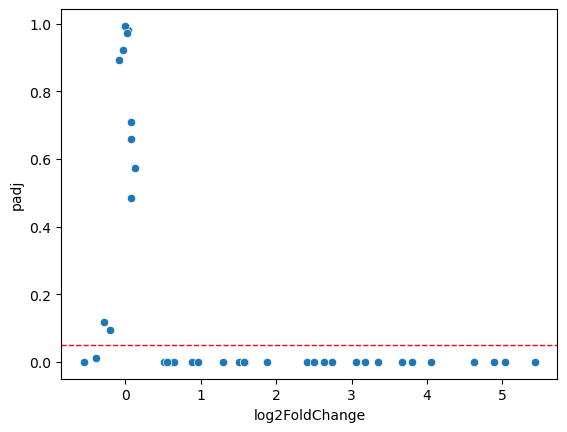

In [130]:
sns.scatterplot(data=lupus_paper_controls,x="log2FoldChange",y="padj")
plt.axhline(y=0.05, color='red', linestyle='--', linewidth=1, label='y = 0.05')
plt.show()

In [113]:
edwin.rename({"seq_id":"Oligo_ID"},axis=1,inplace=True)

In [114]:
edwin=edwin[~edwin["Oligo_ID"].str.contains("RC")]

In [115]:
edwin["refalt"]=edwin["Oligo_ID"].apply(lambda x : x.split("_")[-2])

/tmp/ipykernel_3142757/3829723187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edwin["refalt"]=edwin["Oligo_ID"].apply(lambda x : x.split("_")[-2])


In [116]:
edwin_culled=edwin[~(edwin["refalt"].str.contains("1") | edwin["refalt"].str.contains("2"))]

In [117]:
def simplify_oligo_id(olig_id):
    rsid=olig_id.split("_")[0]
    if "Non" in olig_id:
        return f"{rsid}_alt"
    else:
        return rsid

edwin_culled["ID"]=edwin_culled["Oligo_ID"].apply(lambda x : simplify_oligo_id(x))

/tmp/ipykernel_3142757/1603509172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edwin_culled["ID"]=edwin_culled["Oligo_ID"].apply(lambda x : simplify_oligo_id(x))


In [118]:
controls

,ID,SNP,Direction,Haplotype,C.A.ctrl.mean,C.A.exp.mean,C.A.log2FC,C.A.logP,C.A.logPadj,C.B.ctrl.mean,C.B.exp.mean,C.B.log2FC,C.B.logP,C.B.logPadj,LogSkew.12878,LogSkew.19239,LogSkew.Comb,C.Skew.logP,C.Skew.fdr
0,rs11548103_RC,rs11548103,neg,ref,893.147913,1403.234147,0.637129,20.726159,16.129804,985.132571,1413.418102,0.512199,24.239298,19.642943,-0.157649,-0.070399,-0.124930,1.197350,0.803895
1,rs2016366,rs2016366,pos,ref,316.596386,258.902025,-0.281146,1.799521,0.000000,345.506770,401.928486,0.195118,0.437249,0.000000,0.344054,0.696614,0.476264,NaN,NaN
2,rs2016366_alt,rs2016366,pos,alt,653.148636,605.357051,-0.104744,0.364373,0.000000,627.652912,774.785548,0.287498,1.736553,0.000000,0.390497,0.395150,0.392242,NaN,NaN
3,rs11102212_RC,rs11102212,neg,ref,272.682393,724.187989,1.276380,20.903079,16.306723,270.606119,663.387712,1.183784,18.276201,13.679846,-0.182603,0.057417,-0.092596,0.151356,0.102546
4,rs646867_RC,rs646867,neg,ref,605.412960,595.896429,-0.023234,0.213685,0.000000,978.751908,806.449311,-0.270002,2.243712,0.000000,-0.287121,-0.179513,-0.246768,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39473,rs9621715_alt,rs9621715,pos,alt,650.529931,507.281685,-0.342574,2.658698,0.000000,563.523072,419.823896,-0.401997,2.811763,0.000000,-0.089697,-0.008966,-0.059423,NaN,NaN
39474,rs4275_RC,rs4275,neg,ref,718.716545,859.461801,0.250261,2.474741,0.000000,576.804932,802.800230,0.455674,5.422339,0.825984,0.167059,0.269337,0.205413,NaN,NaN
39475,rs131816_RC,rs131816,neg,ref,754.841862,634.680055,-0.245811,1.350291,0.000000,954.736488,1064.020915,0.151281,1.036517,0.000000,0.473005,0.270571,0.397092,NaN,NaN
39476,rs131816_RC_alt,rs131816,neg,alt,827.703506,840.290995,0.018192,0.117288,0.000000,753.191408,756.170624,0.003935,0.110077,0.000000,-0.011147,-0.019440,-0.014257,NaN,NaN


In [121]:
edwin_culled

,Oligo_ID,twist_seq,sequence,refalt,ID
0,rs10249404_Non-Ref_A,ACTGGCCGCTTGACGTCAGTTAGAAGTCCTAAAGGCCCGGAGTTGC...,TCAGTTAGAAGTCCTAAAGGCCCGGAGTTGCAACTGATGGGGGTTA...,Non-Ref,rs10249404_alt
1,rs10249404_Ref_G,ACTGGCCGCTTGACGTCAGTTAGAAGTCCTAAAGGCCCGGAGTTGC...,TCAGTTAGAAGTCCTAAAGGCCCGGAGTTGCAACTGATGGGGGTTA...,Ref,rs10249404
2,rs1056008_Non-Ref_C,ACTGGCCGCTTGACGCCCCAGGAAGACTCAGTGGCTGAACCAGGTG...,CCCCAGGAAGACTCAGTGGCTGAACCAGGTGGAGTCGTACATCGCA...,Non-Ref,rs1056008_alt
3,rs1056008_Ref_T,ACTGGCCGCTTGACGCCCCAGGAAGACTCAGTGGCTGAACCAGGTG...,CCCCAGGAAGACTCAGTGGCTGAACCAGGTGGAGTCGTACATCGCA...,Ref,rs1056008
4,rs11080327_Non-Ref_A,ACTGGCCGCTTGACGATGAGAGCAATGGCTAAAGTTTGTCTGGCCT...,ATGAGAGCAATGGCTAAAGTTTGTCTGGCCTCGCCCTATGAGAAGG...,Non-Ref,rs11080327_alt
5,rs11080327_Ref_G,ACTGGCCGCTTGACGATGAGAGCAATGGCTAAAGTTTGTCTGGCCT...,ATGAGAGCAATGGCTAAAGTTTGTCTGGCCTCGCCCTATGAGAAGG...,Ref,rs11080327
6,rs11702929_Non-Ref_C,ACTGGCCGCTTGACGTTCCTGGGCTGTGTGACCACAGGCAAGTCCC...,TTCCTGGGCTGTGTGACCACAGGCAAGTCCCTTAACCTCGCTAAGT...,Non-Ref,rs11702929_alt
7,rs11702929_Ref_T,ACTGGCCGCTTGACGTTCCTGGGCTGTGTGACCACAGGCAAGTCCC...,TTCCTGGGCTGTGTGACCACAGGCAAGTCCCTTAACCTCGCTAAGT...,Ref,rs11702929
8,rs11880872_Non-Ref_G,ACTGGCCGCTTGACGGTCTCCTTTGCAAAAGAAAATGTGCCAAGAA...,GTCTCCTTTGCAAAAGAAAATGTGCCAAGAAGGTGGGTGGGGGGGG...,Non-Ref,rs11880872_alt
9,rs11880872_Ref_A,ACTGGCCGCTTGACGGTCTCCTTTGCAAAAGAAAATGTGCCAAGAA...,GTCTCCTTTGCAAAAGAAAATGTGCCAAGAAGGTGGGTGGGGGGGG...,Ref,rs11880872


In [119]:
edwin_culled.merge(controls,how="left",on="ID")

,Oligo_ID,twist_seq,sequence,refalt,ID,SNP,Direction,Haplotype,C.A.ctrl.mean,C.A.exp.mean,...,C.B.ctrl.mean,C.B.exp.mean,C.B.log2FC,C.B.logP,C.B.logPadj,LogSkew.12878,LogSkew.19239,LogSkew.Comb,C.Skew.logP,C.Skew.fdr
0,rs10249404_Non-Ref_A,ACTGGCCGCTTGACGTCAGTTAGAAGTCCTAAAGGCCCGGAGTTGC...,TCAGTTAGAAGTCCTAAAGGCCCGGAGTTGCAACTGATGGGGGTTA...,Non-Ref,rs10249404_alt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rs10249404_Ref_G,ACTGGCCGCTTGACGTCAGTTAGAAGTCCTAAAGGCCCGGAGTTGC...,TCAGTTAGAAGTCCTAAAGGCCCGGAGTTGCAACTGATGGGGGTTA...,Ref,rs10249404,rs10249404,pos,ref,490.669488,580.870573,...,884.378404,2278.974567,1.328305,79.072792,74.476437,1.161497,0.991021,1.097568,3.945534,2.599303
2,rs1056008_Non-Ref_C,ACTGGCCGCTTGACGCCCCAGGAAGACTCAGTGGCTGAACCAGGTG...,CCCCAGGAAGACTCAGTGGCTGAACCAGGTGGAGTCGTACATCGCA...,Non-Ref,rs1056008_alt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,rs1056008_Ref_T,ACTGGCCGCTTGACGCCCCAGGAAGACTCAGTGGCTGAACCAGGTG...,CCCCAGGAAGACTCAGTGGCTGAACCAGGTGGAGTCGTACATCGCA...,Ref,rs1056008,rs1056008,pos,ref,1068.108461,1036.221902,...,821.680231,2475.787604,1.339299,29.337764,24.741409,1.184215,1.765780,1.402302,6.139934,3.707065
4,rs11080327_Non-Ref_A,ACTGGCCGCTTGACGATGAGAGCAATGGCTAAAGTTTGTCTGGCCT...,ATGAGAGCAATGGCTAAAGTTTGTCTGGCCTCGCCCTATGAGAAGG...,Non-Ref,rs11080327_alt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,rs11080327_Ref_G,ACTGGCCGCTTGACGATGAGAGCAATGGCTAAAGTTTGTCTGGCCT...,ATGAGAGCAATGGCTAAAGTTTGTCTGGCCTCGCCCTATGAGAAGG...,Ref,rs11080327,rs11080327,pos,ref,1374.536239,2209.978176,...,918.581377,12516.065346,3.667317,318.865369,314.269014,3.199681,2.688394,3.007948,8.557923,5.221964
6,rs11702929_Non-Ref_C,ACTGGCCGCTTGACGTTCCTGGGCTGTGTGACCACAGGCAAGTCCC...,TTCCTGGGCTGTGTGACCACAGGCAAGTCCCTTAACCTCGCTAAGT...,Non-Ref,rs11702929_alt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,rs11702929_Ref_T,ACTGGCCGCTTGACGTTCCTGGGCTGTGTGACCACAGGCAAGTCCC...,TTCCTGGGCTGTGTGACCACAGGCAAGTCCCTTAACCTCGCTAAGT...,Ref,rs11702929,rs11702929,pos,ref,985.720909,2212.509452,...,1164.155900,6020.038381,2.298095,251.606209,247.009854,1.320393,1.019353,1.207503,5.840931,3.670880
8,rs11880872_Non-Ref_G,ACTGGCCGCTTGACGGTCTCCTTTGCAAAAGAAAATGTGCCAAGAA...,GTCTCCTTTGCAAAAGAAAATGTGCCAAGAAGGTGGGTGGGGGGGG...,Non-Ref,rs11880872_alt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,rs11880872_Ref_A,ACTGGCCGCTTGACGGTCTCCTTTGCAAAAGAAAATGTGCCAAGAA...,GTCTCCTTTGCAAAAGAAAATGTGCCAAGAAGGTGGGTGGGGGGGG...,Ref,rs11880872,rs11880872,pos,ref,755.270880,1356.289358,...,1068.762056,4867.025289,2.092388,182.815425,178.219070,1.138720,1.538231,1.288536,5.491346,3.467141


In [124]:
controls[controls["ID"].str.contains("rs9283753")]

,ID,SNP,Direction,Haplotype,C.A.ctrl.mean,C.A.exp.mean,C.A.log2FC,C.A.logP,C.A.logPadj,C.B.ctrl.mean,C.B.exp.mean,C.B.log2FC,C.B.logP,C.B.logPadj,LogSkew.12878,LogSkew.19239,LogSkew.Comb,C.Skew.logP,C.Skew.fdr
8784,rs9283753,rs9283753,pos,ref,740.420078,1289.124246,0.731377,18.154526,13.558171,525.147174,2121.59268,1.823244,87.852355,83.256,0.944031,1.338259,1.091866,3.490629,2.297545
